In [97]:
import pandas as pd
import spacy
import re
nlp = spacy.load("en_core_web_sm")
data_set = pd.read_csv('blogtext.csv')

In [44]:
print(data_set.groupby('topic')['id'].count())

topic
Accounting                   3832
Advertising                  4676
Agriculture                  1235
Architecture                 1638
Arts                        32449
Automotive                   1244
Banking                      4049
Biotech                      2234
BusinessServices             4500
Chemicals                    3928
Communications-Media        20140
Construction                 1093
Consulting                   5862
Education                   29633
Engineering                 11653
Environment                   592
Fashion                      4851
Government                   6907
HumanResources               3010
Internet                    16006
InvestmentBanking            1292
Law                          9040
LawEnforcement-Security      1878
Manufacturing                2272
Maritime                      280
Marketing                    4769
Military                     3128
Museums-Libraries            3096
Non-Profit                  14700
Publishi

In [63]:
data_bio = data_set[data_set['topic']=='Biotech']
data = data_bio[['id', 'text', 'date']]
df = data[data.groupby('id')['id'].transform('size') > 50]
print(len(df.groupby('id')))


             id gender  age    topic    sign          date  \
15441   3463001   male   41  Biotech     Leo   28,May,2004   
15442   3463001   male   41  Biotech     Leo   27,May,2004   
15443   3463001   male   41  Biotech     Leo   26,May,2004   
15444   3463001   male   41  Biotech     Leo   26,May,2004   
15445   3463001   male   41  Biotech     Leo  30,June,2004   
...         ...    ...  ...      ...     ...           ...   
673724  2373875   male   25  Biotech  Taurus  23,Maio,2004   
673725  2373875   male   25  Biotech  Taurus  23,Maio,2004   
673726  2373875   male   25  Biotech  Taurus  23,Maio,2004   
673727  2373875   male   25  Biotech  Taurus  23,Maio,2004   
673728  2373875   male   25  Biotech  Taurus  23,Maio,2004   

                                                     text  
15441          Couldn't sleep last night at all. The i...  
15442          I saw it. The video.   It's every bit a...  
15443          Today is busy. Prep day. Tomorrow, Cher...  
15444          

In [120]:
def get_trigram_features(pos_string):
    # Trigrams list
    # NVN NNV VNN NADPPROPN NNCCONJ NOUNPREPDET DETNOUNPREP VNV NNN  NOUNPREPNOUN VPREPDET
    features = {}
    features['nvn'] = len(re.findall('(NOUN VERB NOUN)', pos_string))
    features['nnv'] = len(re.findall('(NOUN NOUN VERB)', pos_string))
    features['vnn'] = len(re.findall('(VERB NOUN NOUN)', pos_string))
    features['vnv'] = len(re.findall('(VERB NOUN VERB)', pos_string))
    features['nap'] = len(re.findall('(NOUN ADP PROPN)', pos_string))
    features['nnc'] = len(re.findall('(NOUN NOUN CCONJ)', pos_string))
    features['nad'] = len(re.findall('(NOUN ADP DET)', pos_string))
    features['dna'] = len(re.findall('(DET NOUN ADP)', pos_string))
    features['nnn'] = len(re.findall('(NOUN NOUN NOUN)', pos_string))
    features['nan'] = len(re.findall('(NOUN ADP NOUN)', pos_string))
    features['vad'] = len(re.findall('(VERB ADP DET)', pos_string))
    
    return features 


closed_class = ['ADP','AUX','CCONJ','DET','NUM','PART','PRON','SCONJ']

ids = df['id'].unique()

mean_features = pd.DataFrame(columns=['id','nvn','nnv','vnn','vnv','nap','nnc','nad','dna','nnn','nan','vad'])
for id in ids:
    features = []
    for text in df.loc[df['id']==id, 'text']:
        tokenized = nlp(text)
        pos_only = []
        for token in tokenized:
            pos_only.append(token.pos_)
            # print(token.lemma_, token.pos_, token.tag_)
        trigram_features = get_trigram_features(' '.join(pos_only))
        trigram_features['id']=id
        features.append(trigram_features)
    
    mean = pd.DataFrame(features)
    # print(mean)
    mean_features = mean_features.append(mean, ignore_index=True)
print(mean_features)

           id nvn nnv vnn vnv nap nnc nad dna nnn nan vad
0     3310475   1   0   0   0   0   1   0   0   0   0   1
1     3310475   0   0   0   0   0   0   0   0   0   0   0
2     3310475   0   0   0   0   0   1   3   5   1   3   1
3     3310475   0   0   0   0   0   1   4   5   0   7   3
4     3310475   0   0   1   0   0   0   0   0   0   0   0
...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
1537  2373875   0   1   0   0   0   0   1   3   2   4   1
1538  2373875   0   0   0   0   0   0   0   0   0   0   0
1539  2373875   0   0   0   0   0   0   0   1   0   0   0
1540  2373875   0   0   0   0   0   0   0   0   0   0   0
1541  2373875   0   0   0   0   0   0   0   0   0   0   0

[1542 rows x 12 columns]


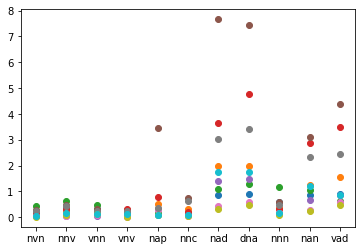

In [149]:

mean_features = mean_features.apply(pd.to_numeric)
mean_feat = mean_features.groupby('id').mean()


import matplotlib.pyplot as plt

mean_feat['id'] = mean_feat.index
ids = mean_feat['id'].unique()

plt.figure()

cols = mean_feat.columns[:-1]
for id in ids:
    plt.scatter(cols, mean_feat.loc[mean_feat['id']==id, mean_feat.columns != 'id'])

